In [2]:
import requests
headers = {'x-api-key':'your_key'}
payload = {
    'lat':34.071783,
    'lng':-118.2596,
    'searchtype':'addresscoord',
    'getloma':'False'
    }
s = requests.get('https://api.nationalflooddata.com/data',headers=headers,params=payload)

In [1]:
pip install predicthq

Note: you may need to restart the kernel to use updated packages.


In [2]:
from predicthq import Client

phq = Client(access_token="80h2v8Pl6eeevIY2us9fXMe7vfMHJkdcAL8gElws")

for event in phq.events.search(q="Storm", rank_level=[4, 5], country='US'):
    print(event.rank, event.category, event.title, event.start.strftime('%Y-%m-%d'))

In [22]:
x=''
for event in phq.events.search(q="landslides", rank_level=[4, 5], country='US'):
    x = event
    print(event.rank, event.category, event.title, event.start.strftime('%Y-%m-%d'))

In [8]:
#GLOBAL_VAR
PREDICTION_THRESHOLD = 4
RESOURCES_INFO_ENDPOINT = 'http://10.157.186.185/3000'

In [3]:
import pandas as pd
data = pd.read_csv('./AEGISDataset.csv')

In [3]:
data.describe()

,lat,lon,flood_heig,elevation,precipitat
count,3510.000000,3510.000000,3510.000000,3510.000000,3510.000000
mean,14.587452,121.044725,2.296296,15.935203,9.816239
std,0.076546,0.051857,1.879215,16.126777,2.523668
min,14.318917,120.901258,0.000000,0.000000,0.000000
25%,14.554644,121.004538,1.000000,6.804772,8.000000
50%,14.588837,121.051632,2.000000,9.745048,9.000000
75%,14.633395,121.087746,3.000000,15.439678,11.000000
max,14.807192,121.142470,8.000000,91.833778,21.000000


In [36]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [3]:
X, y = data.iloc[:,3:5], data.iloc[:, 3]

In [4]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

C:\Users\gokul\AppData\Local\Continuum\anaconda3\envs\callForCode\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\gokul\AppData\Local\Continuum\anaconda3\envs\callForCode\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [6]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [7]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[01:55:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [10]:
X_train.shape

(2808, 2)

In [11]:
X_test.shape

(702, 2)

In [8]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[01:55:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:55:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:55:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [9]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,20.134703,0.061792,20.128484,0.108364
1,18.824236,0.520165,18.809740,0.383230
2,17.330294,0.837461,17.323078,0.691634
3,16.310685,1.209439,16.303740,1.076104
4,15.420634,1.577524,15.401327,1.472919


In [9]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[01:55:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [13]:
# pip install graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/users/gokul/appdata/local/continuum/anaconda3/envs/callforcode/lib/site-packages/graphviz'

In [18]:
dd = pd.DataFrame({'elevation': [54.5533], 'precipitat': [9.0]})
d1=xgb.DMatrix(data=dd)
xg_reg.predict(d1)

array([27.063877], dtype=float32)

In [19]:
preds

array([10.493981 ,  5.8247805,  7.7548776,  5.2872334, 11.713658 ,
       10.246678 ,  7.0829363,  5.8536587,  4.968905 ,  5.2192154,
        7.694003 ,  5.8536587,  9.694671 , 15.557825 , 10.961555 ,
        9.920526 ,  6.842968 ,  5.8078537,  7.898779 ,  7.7548776,
        6.6043816, 10.951163 ,  5.729357 ,  6.251462 , 34.35122  ,
        7.1156926,  8.442869 ,  5.8536587, 24.1912   ,  5.5083337,
        6.9645495,  9.694671 ,  8.946135 ,  8.910442 , 12.22097  ,
        6.8552094,  6.460101 ,  8.195567 ,  7.223373 ,  7.1349874,
       12.111424 ,  5.8536587,  6.842968 , 22.123196 ,  7.7548776,
        6.1312313,  5.729357 ,  6.779765 ,  9.920526 , 10.246678 ,
       23.00554  ,  5.5083337, 11.255905 , 28.573181 ,  7.4202247,
       10.789553 ,  5.1736817,  6.271961 , 10.961555 ,  9.094581 ,
        6.672085 ,  7.0829363, 15.862591 , 12.473505 , 19.777851 ,
       13.052598 , 24.1912   ,  9.164979 , 11.375905 ,  7.694003 ,
        6.2210364,  7.48673  ,  8.195567 , 10.169858 ,  6.9645

In [26]:
xg_reg

{'elevation': 68, 'precipitat': 34}

In [6]:
locality_data = pd.read_csv('./LocalityDataset.csv')

            lat         lon  flood_heig  elevation  precipitat
0     14.640394  121.055708           0  54.553295         9.0
1     14.698299  121.002132           0  21.856272        10.0
2     14.698858  121.100261           0  69.322807        16.0
3     14.571310  120.983334           0  10.987241         8.0
4     14.762232  121.075735           0  87.889847        18.0
...         ...         ...         ...        ...         ...
3505  14.565436  121.132076           8  12.006505        14.0
3506  14.633785  120.978465           8   8.572678         8.0
3507  14.563166  121.121095           8   5.772885        13.0
3508  14.549214  121.028014           8  22.342602         7.0
3509  14.657013  121.054423           8  53.466404         9.0

[3510 rows x 5 columns]


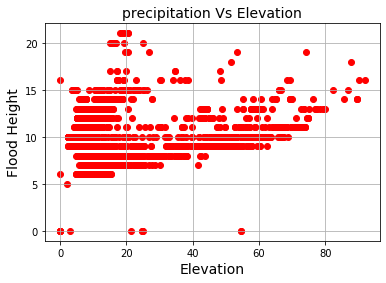

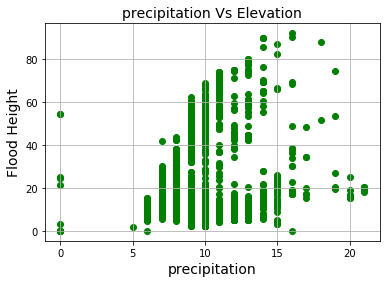

Intercept: 
 1.9863232583123527
Coefficients: 
 [-0.00716914  0.0432156 ]
flood_heig: 
 [6.56141491]


C:\Users\gokul\AppData\Local\Continuum\anaconda3\envs\callForCode\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm
# import tkinter as tk

water_level = pd.read_csv("AEGISDataset.csv")

water_level.head()
#print(water_level)
df = DataFrame(water_level,columns=['lat','lon','flood_heig','elevation','precipitat'])
print (df)
plt.scatter(df['elevation'], df['precipitat'], color='red')
plt.title('precipitation Vs Elevation', fontsize=14)
plt.xlabel('Elevation', fontsize=14)
plt.ylabel('Flood Height', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(df['precipitat'], df['elevation'], color='green')
plt.title('precipitation Vs Elevation', fontsize=14)
plt.xlabel('precipitation', fontsize=14)
plt.ylabel('Flood Height', fontsize=14)
plt.grid(True)
plt.show()

X = df[['elevation','precipitat']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df['flood_heig']

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
New_elevation = 85.19583
New_precipitation = 120
print ('flood_heig: \n', regr.predict([[New_elevation ,New_precipitation]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)


#tkinter GUI
root= tk.Tk()

canvas1 = tk.Canvas(root, width = 1200, height = 450)
canvas1.pack()

# with sklearn
Intercept_result = ('Intercept: ', regr.intercept_)
label_Intercept = tk.Label(root, text=Intercept_result, justify = 'center')
canvas1.create_window(260, 220, window=label_Intercept)

# with sklearn
Coefficients_result  = ('Coefficients: ', regr.coef_)
label_Coefficients = tk.Label(root, text=Coefficients_result, justify = 'center')
canvas1.create_window(260, 240, window=label_Coefficients)

# with statsmodels
print_model = model.summary()
label_model = tk.Label(root, text=print_model, justify = 'center', relief = 'solid', bg='LightSkyBlue1')
canvas1.create_window(800, 220, window=label_model)


# New_Interest_Rate label and input box
label1 = tk.Label(root, text='Type elevation: ')
canvas1.create_window(100, 100, window=label1)

entry1 = tk.Entry (root) # create 1st entry box
canvas1.create_window(270, 100, window=entry1)

# New_Unemployment_Rate label and input box
label2 = tk.Label(root, text=' Type precipitation: ')
canvas1.create_window(120, 120, window=label2)

entry2 = tk.Entry (root) # create 2nd entry box
canvas1.create_window(270, 120, window=entry2)


def values():
    global New_elevation #our 1st input variable
    New_elevation = float(entry1.get())

    global New_precipitation #our 2nd input variable
    New_precipitation = float(entry2.get())

    Prediction_result  = ('Predicted Flood_height: ', regr.predict([[New_elevation ,New_precipitation]]))
    label_Prediction = tk.Label(root, text= Prediction_result, bg='orange')
    canvas1.create_window(260, 280, window=label_Prediction)

button1 = tk.Button (root, text='Predict Flood Height',command=values, bg='orange') # button to call the 'values' command above
canvas1.create_window(270, 150, window=button1)


root.mainloop()

In [ ]:
water_level = pd.read_csv("AEGISDataset.csv")
pp_level = pd.read_csv("newset.csv")
water_level.head()
pp_level.head()
#print(water_level)
df = DataFrame(water_level,columns=['lat','lon','flood_heig','elevation','precipitat'])

gg= DataFrame(pp_level,columns=['Lattitude','Longitude','Precipitation','Elevation '])
print (gg)

In [11]:
from flask import Flask, jsonify, request
app = Flask(__name__)
@app.route('/predict', methods=['get'])
def predict():
    latt = request.args.get('lat')
    long = request.args.get('long')
    print(latt)
    env_pp = gg.loc[gg['Lattitude'] == 14.64039374]
    query_df = [env_pp['Elevation'] ,env_pp['Precipitation']]
    prediction = regr.predict([query_df])
    if prediction > PREDICTION_THRESHOLD:
        #get resources from DB
        donors_data = requests.get(RESOURCES_INFO_ENDPOINT)
        print(donors_data)
        return jsonify({'prediction': list(prediction),
                       'donors_data': donors_data})

if __name__ == "__main__":
    app.run(port=5011)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5011/ (Press CTRL+C to quit)
127.0.0.1 - - [14/Sep/2019 11:22:45] "GET /predict?lat=234&long=23424 HTTP/1.1" 200 -


234


    Lattitude   Longitude  Precipitation  Elevation 
0   14.640394  121.055708      54.553295           9
1   14.653677  121.021332      27.527657           9
2   14.518564  121.073459       6.306269           9
3   14.509733  121.065512       7.486139           9
4   14.627683  120.992561      10.424126           8
5   14.516661  121.072550       6.791687           9
6   14.525169  121.074017       6.196056           9
7   14.534339  121.009837       8.168192           7
8   14.618302  121.035172      27.511301           8
9   14.665284  121.031723      37.216305           9
10  14.630504  121.011004      13.523409           8
11  14.629331  121.012522      15.569142           8


,Lattitude,Longitude,Precipitation,Elevation
0,14.640394,121.055708,54.553295,9
